# <font color=#0404B4>**ĐỒ ÁN THỰC HÀNH - NHẬP MÔN KHOA HỌC DỮ LIỆU** </font>

### <font color=#0404B4> Bảng thành viên nhóm 7 </font>
|<center><div style="width:150px">MSSV</div><center>|<center><div style="width:290px">Họ và tên</div><center>|
|---------- |:-------------:|
| <center>20120041<center>  | <center>Trần Kim Bảo<center> |
| <center>20120053<center>  |   <center>Nguyễn Thành Đạt<center>   | 
| <center>20120071<center>  |<center>Nguyễn Thị Bích Hà<center> |
| <center>20120084<center>  | <center>Nguyễn Văn Hiếu<center> |
| <center>20120113<center>  | <center>Lê Nguyên Khang<center> |

In [1]:
# !pip install vega
# !pip install altair

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import math
import copy
import altair as alt
# alt.renderers.enable('notebook')
alt.renderers.enable('default')

#MÔ HÌNH
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

# <font color=#0404B4>Table of Contents</font>
1. [Thu thập dữ liệu](#1)
2. [Khám phá và tiền xử lý dữ liệu](#2)
3. [Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp?](#3)
4. [Với mỗi cột, các giá trị được phân bố như thế nào?](#4)
5.

<a name="1"></a>
# <font color=#0404B4> A. Thu thập dữ liệu</font>

### Tại sao lại chọn bộ dữ liệu này?
- Đại dịch Covid-19 vừa qua đã gây nhiều ảnh hưởng, tác động tích cực lẫn tiêu cực lên đời sống của con người. Do đó, nhiều cuộc khảo sát và phân tích đã diễn ra trong suốt quá trình dịch hoành hành và cả sau khi đại dịch giảm bớt. Đặc biệt, đối với đất nước Ấn Độ, đại dịch Covid-19 đã để lại những hậu quả nặng nề, người chết nhiều vô số kể do điều kiện chăm sóc và kinh tế của đất nước này. Với sự tò mò, nhóm đã đặc biệt quan tâm đến tình hình của Ấn Độ hơn so với những đất nước tiên tiến và phát triển khác. Và đối với của đất nước này, nhóm cảm thấy khá thú vị trong việc tìm hiểu và khai thác về mặt giáo dục lẫn sức khỏe tinh thần của sinh viên, học sinh trong hoàn cảnh phải đối mặt với cơn đại dịch. Vì thế, nhóm đã chọn khai thác bộ dữ liệu về vấn đề nêu trên, để phân tích sâu hơn tình hình ở thời điểm hiện tại (năm 2020) khi Covid-19 bùng phát trên đất nước Ấn Độ. 

### Nguồn gốc và giấy phép sử dụng của bộ dữ liệu?
- Nhóm sử dụng dữ liệu [**COVID-19 Survey Student Responses.csv**](https://www.kaggle.com/datasets/kunal28chaturvedi/covid19-and-its-impact-on-students)
- Tập dữ liệu mô tả Tác động của đợt bùng phát COVID-19 đối với Giáo dục, Sức khỏe tâm thần và Thói quen hàng ngày. Trong nghiên cứu này, một cuộc khảo sát cắt ngang (cross-sectional survey) được tiến hành với 1182 sinh viên thuộc các nhóm tuổi khác nhau đến từ các cơ sở giáo dục khác nhau ở vùng Thủ đô Quốc gia Delhi (NCR) - Ấn Độ vào năm 2020.
- LICENSE của dữ liệu là [**CC0: Public Domain**](https://creativecommons.org/publicdomain/zero/1.0/) - người dùng được phép sử dụng với mục đích phi thương mại và phải credit cho chủ sở hữu.
- Người ta thu thập dữ liệu bằng cách thực hiện khảo sát trên giấy.

<a name="2"></a>
# <font color=#0404B4> B. Khám phá và tiền xử lý dữ liệu</font>


## 1. Đọc dữ liệu từ file

In [3]:
df = pd.read_csv("COVID-19 Survey Student Responses.csv")
df.head(10)

ID Region of residence  Age of Subject  Time spent on Online Class  \
0   R1           Delhi-NCR              21                         2.0   
1   R2           Delhi-NCR              21                         0.0   
2   R3           Delhi-NCR              20                         7.0   
3   R4           Delhi-NCR              20                         3.0   
4   R5           Delhi-NCR              21                         3.0   
5   R6           Delhi-NCR              21                         0.0   
6   R7           Delhi-NCR              19                         2.0   
7   R8   Outside Delhi-NCR              19                         2.0   
8   R9           Delhi-NCR              21                         3.0   
9  R10   Outside Delhi-NCR              20                         0.0   

  Rating of Online Class experience Medium for online class  \
0                              Good          Laptop/Desktop   
1                         Excellent              Smartphone   
2                         Very poor          Laptop/Desktop   
3                         Very poor              Smartphone   
4                              Good          Laptop/Desktop   
5                         Very poor              Smartphone   
6                         Very poor              Smartphone   
7                         Very poor                  Tablet   
8                         Very poor          Laptop/Desktop   
9                         Very poor          Laptop/Desktop   

   Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                       4.0                    0.0                  7.0   
1                       0.0                    2.0                 10.0   
2                       3.0                    0.0                  6.0   
3                       2.0                    1.0                  6.0   
4                       3.0                    1.0                  8.0   
5                       6.0                    0.0                  5.0   
6                       2.0                    1.0                  5.0   
7                       1.0                    1.0                 10.0   
8                       4.0                    1.0                  8.0   
9                       1.0                    0.5                  8.0   

   Time spent on social media Prefered social media platform Time spent on TV  \
0                         3.0                       Linkedin                1   
1                         3.0                        Youtube                0   
2                         2.0                       Linkedin                0   
3                         5.0                      Instagram                0   
4                         3.0                      Instagram                1   
5                         1.0                        Youtube                0   
6                         4.0                      Instagram                0   
7                         5.0                      Instagram                0   
8                         2.0                       Whatsapp                1   
9                         5.0                      Instagram                3   

   Number of meals per day Change in your weight Health issue during lockdown  \
0                        4             Increased                           NO   
1                        3             Decreased                           NO   
2                        3       Remain Constant                           NO   
3                        3             Decreased                           NO   
4                        4       Remain Constant                           NO   
5                        1             Decreased                          YES   
6                        3             Increased                           NO   
7                        3             Increased                          YES   
8                        3             Increased

### 2.2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

* Mỗi dòng thể hiện thông tin chi tiết sinh hoạt của học sinh/ sinh viên/ giảng viên sau tác động của COVID-19 đối với giáo dục và đời sống xã hội và sức khỏe tinh thần.
* **Không** có dòng nào có ý nghĩa khác nhau.

### 2.3. Dữ liệu có các dòng bị lặp không?

Kiểm tra việc này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị `True` nếu dữ liệu có các dòng bị lặp và có giá trị `False` nếu ngược lại. Do ở đây cột `ID` mang tính định danh cho từng cá nhân nên ta sẽ kiểm tra xem thử có ID  nào trùng nhau không.

In [4]:
check_duplicated = set(df.ID.duplicated())

if True in check_duplicated:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
    
if (have_duplicated_rows == True):
    print('Có dòng dữ liệu bị lặp')
else:
    print('Không có dòng dữ liệu nào bị lặp')

Không có dòng dữ liệu nào bị lặp


<h3> 2.4. Mỗi cột có ý nghĩa gì?</h3>

|STT|Tên cột dữ liệu | <center>Mô tả<center> | Đơn vị |
|--|:------:| ---| --- |
|1|ID|<center>Mã định danh của từng người<center>|
|2|Region of residence| <center>Khu vực sinh sống<center>|
|3|Age of Subject|<center>Tuổi<center>| Năm
|4|Time spent on Online Class| <center>Thời gian học Online<center>| Giờ|
|5|Rating of Online Class experience|<center>Xếp loại kinh nghiệm học Online<center>|  | 
|6|Medium for online class|<center>Thiết bị sử dụng học Online<center>|  Giờ
|7|Time spent on self study|<center>Thời gian tự học<center>| Giờ |
|8|Time spent on fitness|<center>Thời gian thể dục, tập luyện<center>| Giờ |
|9|Time spent on sleep|<center>Thời gian ngủ<center>| Giờ |
|10|Time spent on social media|<center>Thời gian sử dụng MXH<center>| Giờ |
|11|Prefered social media platform|<center>Nền tảng MXH sử dụng<center>| |
|12|Time spent on TV|<center>Thời gian sử dụng TV<center>| Giờ |
|13|Number of meals per day|<center>Số bữa ăn trong ngày<center>| Lần |
|14|Change in your weight|<center>Dao động cân nặng<center>|  |
|15|Health issue during lockdown|<center>Có vấn đề gì về sức khỏe trong khoảng thời gian đóng cửa vì COVID-19 không?<center>|  |
|16|Stress busters|<center>Việc làm giúp xả stress<center>|  |
|17|Time utilized|<center>Thời gian được tối ưu không?<center>|  |
|18|Do you find yourself more connected with your family, close friends , relatives  ?|<center>Có cảm thấy được gắn kết nhiều hơn vớ gia đình, bạn bè không?<center>|  |
|19|What you miss the most|<center>Điều gì bạn hối tiếc nhất?<center>|



* **Thời gian cập nhật dữ liệu** 2020

<h3> 2.5. Với mỗi cột, dữ liệu phân bố như thế nào?</h3>

In [5]:
df.columns

Index(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day', 'Change in your weight',
       'Health issue during lockdown', 'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

3 Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợpđể có thể xử lý tiếp hay không?

4 Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?

5 Có cần phải tiền xử lý dữ liệu hay không và nếu có thì nhóm sinh viên cần phải xử lý như thế nào?

<a name="3"></a>
## <font color=#0404B4>3. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp?</font>



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

Ta thấy một số vấn đề cần giải quyết:

- Cột `Time spent on TV` là cột đúng ra có dạng dữ liệu numerical. Nên ta sẽ tiến hành xử lý các cột này để đưa chúng về đúng kiểu dữ liệu.

In [8]:
df['Time spent on TV'].unique()

array(['1', '0', '3', '0.5', 'n', '2', '4.5', '1.5', 'N', '4', '0.3', '5',
       'No tv', '0.1', '0.25', '6', '0.6', '7', '8', '15', ' ', '0.75',
       '2.5', '3.5', '0.4'], dtype=object)

Ta sẽ tiến hành xử lý các giá trị "No tv", "N", "n", và " " bằng cách quy đổi chúng về 0, tức là số giờ sử dụng TV là 0 giờ.

In [9]:
def conditions(x):
    if x=='No tv' or x=='n' or x=='N' or x==' ':
        return '0'
    else: 
        return x
    
df['Time spent on TV'] = df['Time spent on TV'].apply(conditions)

Cuối cùng, ta tiến hành ép kiểu cột `Time spent on TV` thành kiểu dữ liệu `float`.

In [10]:
df['Time spent on TV'] = df['Time spent on TV'].apply(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

<a name="4"></a>
## <font color=#0404B4> 4. Với mỗi cột, các giá trị được phân bố như thế nào?</font>

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 8 cột thuộc nhóm numeric: `Age of Subject`, `Time spent on Online Class`, `Time spent on self study`, `Time spent on fitness`, `Time spent on sleep`, `Time spent on social media`, `Time spent on TV`, `Number of meals per day`.

In [11]:
pd.set_option('display.max_colwidth', 200)
numerical_cols = df[df.select_dtypes(exclude=['object']).columns]
numerical_cols.head(5)

Age of Subject  Time spent on Online Class  Time spent on self study  \
0              21                         2.0                       4.0   
1              21                         0.0                       0.0   
2              20                         7.0                       3.0   
3              20                         3.0                       2.0   
4              21                         3.0                       3.0   

   Time spent on fitness  Time spent on sleep  Time spent on social media  \
0                    0.0                  7.0                         3.0   
1                    2.0                 10.0                         3.0   
2                    0.0                  6.0                         2.0   
3                    1.0                  6.0                         5.0   
4                    1.0                  8.0                         3.0   

   Time spent on TV  Number of meals per day  
0               1.0                        4  
1               0.0                        3  
2               0.0                        3  
3               0.0                        3  
4               1.0                        4

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Và lưu kết quả vào Dataframe `nume_col_profiles_df`.
Dataframe này gồm có:
- 3 dòng là `missing_ratio`, `min`, `max` lần lượt là tỉ lệ các giá trị thiếu mỗi cột, min và max.
- 8 cột là các thuộc tính thuộc kiểu dữ liệu **numerical**.

In [12]:
def missing_ratio(c):
    return  c.isna().sum()/len(df) * 100

def min(c):
    return c.min()

def max(c):
    return c.max()

nume_col_profiles_df = numerical_cols.agg([missing_ratio, min, max])
nume_col_profiles_df

Age of Subject  Time spent on Online Class  \
missing_ratio             0.0                         0.0   
min                       7.0                         0.0   
max                      59.0                        10.0   

               Time spent on self study  Time spent on fitness  \
missing_ratio                       0.0                    0.0   
min                                 0.0                    0.0   
max                                18.0                    5.0   

               Time spent on sleep  Time spent on social media  \
missing_ratio                  0.0                         0.0   
min                            4.0                         0.0   
max                           15.0                        10.0   

               Time spent on TV  Number of meals per day  
missing_ratio               0.0                      0.0  
min                         0.0                      1.0  
max                        15.0                      8.0

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 11 cột thuộc nhóm categorical: `ID`, `Region of residence`, `Rating of Online Class experience`, `Rating of Online Class experience`, `Medium for online class`, `Prefered social media platform`, `Change in your weight`, `Change in your weight`, `Health issue during lockdown`, `Stress busters`, `Time utilized`, `Do you find yourself more connected with your family, close friends , relatives  ?`, `What you miss the most`. 

In [13]:
pd.set_option('display.max_colwidth', 200)
object_cols = df[df.select_dtypes(include=['object']).columns]
object_cols.head(5)

ID Region of residence Rating of Online Class experience  \
0  R1           Delhi-NCR                              Good   
1  R2           Delhi-NCR                         Excellent   
2  R3           Delhi-NCR                         Very poor   
3  R4           Delhi-NCR                         Very poor   
4  R5           Delhi-NCR                              Good   

  Medium for online class Prefered social media platform  \
0          Laptop/Desktop                       Linkedin   
1              Smartphone                        Youtube   
2          Laptop/Desktop                       Linkedin   
3              Smartphone                      Instagram   
4          Laptop/Desktop                      Instagram   

  Change in your weight Health issue during lockdown  \
0             Increased                           NO   
1             Decreased                           NO   
2       Remain Constant                           NO   
3             Decreased                           NO   
4       Remain Constant                           NO   

                   Stress busters Time utilized  \
0                         Cooking           YES   
1  Scrolling through social media           YES   
2              Listening to music            NO   
3             Watching web series            NO   
4                    Social Media            NO   

  Do you find yourself more connected with your family, close friends , relatives  ?  \
0                                                                                YES   
1                                                                                 NO   
2                                                                                YES   
3                                                                                 NO   
4                                                                                 NO   

  What you miss the most  
0         School/college  
1  Roaming around freely  
2             Travelling  
3    Friends , relatives  
4             Travelling

Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Kết quả được lưu vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là `missing_ratio`, `num_diff_vals`, `ratio_diff_vals`; và có 7 cột là các thuộc tính có kiểu dữ liệu **categorical**.

In [14]:
def num_diff_vals(col):
    return len(col.value_counts())

def ratio_diff_vals(col):
    return np.round(col.value_counts(normalize=True),2).to_dict()

cate_col_profiles_df=object_cols.agg([missing_ratio,num_diff_vals,ratio_diff_vals])
cate_col_profiles_df

ID  \
missing_ratio                                                                                                                                                                                                        0.0   
num_diff_vals                                                                                                                                                                                                       1182   
ratio_diff_vals  {'R480': 0.0, 'R546': 0.0, 'R450': 0.0, 'R1174': 0.0, 'R779': 0.0, 'R12': 0.0, 'R670': 0.0, 'R1143': 0.0, 'R984': 0.0, 'R1119': 0.0, 'R500': 0.0, 'R902': 0.0, 'R171': 0.0, 'R237': 0.0, 'R907': 0.0...   

                                            Region of residence  \
missing_ratio                                               0.0   
num_diff_vals                                                 2   
ratio_diff_vals  {'Delhi-NCR': 0.61, 'Outside Delhi-NCR': 0.39}   

                                                                  Rating of Online Class experience  \
missing_ratio                                                                              2.030457   
num_diff_vals                                                                                     5   
ratio_diff_vals  {'Very poor': 0.36, 'Average': 0.33, 'Good': 0.2, 'Excellent': 0.08, 'Poor': 0.03}   

                                                                                                              Medium for online class  \
missing_ratio                                                                                                                4.314721   
num_diff_vals                                                                                                                       5   
ratio_diff_vals  {'Laptop/Desktop': 0.48, 'Smartphone': 0.48, 'Tablet': 0.03, 'Smartphone or Laptop/Desktop': 0.0, 'Any Gadget': 0.0}   

                                                                                                                                                                                          Prefered social media platform  \
missing_ratio                                                                                                                                                                                                        0.0   
num_diff_vals                                                                                                                                                                                                         16   
ratio_diff_vals  {'Instagram': 0.3, 'Whatsapp': 0.28, 'Youtube': 0.27, 'Linkedin': 0.05, 'Facebook': 0.04, 'Twitter': 0.02, 'None': 0.01, 'Snapchat': 0.01, 'Reddit': 0.0, 'Telegram': 0.0, 'None ': 0.0, 'WhatsApp':...   

                                                           Change in your weight  \
missing_ratio                                                                0.0   
num_diff_vals                                                                  3   
ratio_diff_vals  {'Remain Constant': 0.45, 'Increased': 0.37, 'Decreased': 0.18}   

                Health issue during lockdown  \
missing_ratio                            0.0   
num_diff_vals                              2   
ratio_diff_vals    {'NO': 0.86, 'YES': 0.14}   

                                                                                                                                                                                                          Stress busters  \
missing_ratio                                                                                                                                                                                                        0.0   
num_diff_vals                                                                                                                                                                                                         86   
ratio_diff_vals  {'Listening to

<a name="5"></a>
## <font color=#0404B4> 5. Có cột nào cần phải tiền xử lý hay không?</font>


Nếu ta để ý kĩ, cột `Prefered social media platform` xuất hiện trường hợp trùng lắp thông tin, ta sẽ kiểm tra các giá trị hiện đang có trong cột này.

In [15]:
df['Prefered social media platform'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'Whatsapp', 'None', 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'None ', 'Quora', 'Talklife', 'WhatsApp'], dtype=object)

Ta thấy ở đây có 2 trường hợp:
- **'WhatsApp'** và **'Whatsapp'** là cùng 1 platform nhưng do quá trình nhập dữ liệu đã gây ra sự xung đột về thông tin. Do đó, ở trường hợp này ta sẽ xử lý bằng cách đưa toàn bộ giá trị **'Whatsapp'** về **'WhatsApp'**.
- **'None '** và **'None'** cũng tương tự trường hợp trên và ta sẽ đưa về **'None'**.

In [16]:
df['Prefered social media platform'] = df['Prefered social media platform'].replace(to_replace=['Whatsapp', 'None '],
           value=['WhatsApp', 'None'])

Ta kiểm tra lại sau khi đã xử lý các trường hợp trên:

In [17]:
df['Prefered social media platform'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'WhatsApp', 'None', 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'Quora', 'Talklife'], dtype=object)

<a name="6"></a>
# <font color=#0404B4> C. Khám phá mối quan hệ trong dữ liệu</font>

In [18]:
df.head()

ID Region of residence  Age of Subject  Time spent on Online Class  \
0  R1           Delhi-NCR              21                         2.0   
1  R2           Delhi-NCR              21                         0.0   
2  R3           Delhi-NCR              20                         7.0   
3  R4           Delhi-NCR              20                         3.0   
4  R5           Delhi-NCR              21                         3.0   

  Rating of Online Class experience Medium for online class  \
0                              Good          Laptop/Desktop   
1                         Excellent              Smartphone   
2                         Very poor          Laptop/Desktop   
3                         Very poor              Smartphone   
4                              Good          Laptop/Desktop   

   Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                       4.0                    0.0                  7.0   
1                       0.0                    2.0                 10.0   
2                       3.0                    0.0                  6.0   
3                       2.0                    1.0                  6.0   
4                       3.0                    1.0                  8.0   

   Time spent on social media Prefered social media platform  \
0                         3.0                       Linkedin   
1                         3.0                        Youtube   
2                         2.0                       Linkedin   
3                         5.0                      Instagram   
4                         3.0                      Instagram   

   Time spent on TV  Number of meals per day Change in your weight  \
0               1.0                        4             Increased   
1               0.0                        3             Decreased   
2               0.0                        3       Remain Constant   
3               0.0                        3             Decreased   
4               1.0                        4       Remain Constant   

  Health issue during lockdown                  Stress busters Time utilized  \
0                           NO                         Cooking           YES   
1                           NO  Scrolling through social media           YES   
2                           NO              Listening to music            NO   
3                           NO             Watching web series            NO   
4                           NO                    Social Media            NO   

  Do you find yourself more connected with your family, close friends , relatives  ?  \
0                                                                                YES   
1                                                                                 NO   
2                                                                                YES   
3                                                                                 NO   
4                                                                                 NO   

  What you miss the most  
0         School/college  
1  Roaming around freely  
2             Travelling  
3    Friends , relatives  
4             Travelling

In [19]:
def distribution(df, name_col):
    hist = alt.Chart(df).mark_bar().encode(x=name_col, y='count()').properties(
    width=180,
    height=180
    )
    return hist


names = list(df.columns)
plts = list()
for name in names[1:]:
    plts.append(distribution(df, name))

plts[0]|plts[1]|plts[2]|plts[3]|plts[4]

alt.HConcatChart(...)

### Nhận xét:


In [20]:
plts[5]|plts[6]|plts[7]|plts[8]

alt.HConcatChart(...)

In [21]:
plts[9]|plts[10]|plts[11]|plts[12]

alt.HConcatChart(...)

In [22]:
plts[13]|plts[15]|plts[16]

alt.HConcatChart(...)

### 1. Khám phá mối quan hệ giữa các thuộc tính `Time ...` đến thuộc tính `Time utilized`.

**Ý nghĩa khi trả lời câu hỏi:** 
 * 2 trường hợp:
    * Có mối quan hệ: dựa vào mô hình, mối quan hệ để xác định biến (thuộc tính) nào đóng vai trò quan trọng trong mô hình.
    * Không có mối quan hệ: Đưa ra kết luận việc tối ưu hóa được thời gian tùy thuộc vào mục đích sử dụng thời gian của từng sinh viên/học sinh.

**Nguồn cảm hứng đặt câu hỏi:**
* Biết thêm sức ảnh hưởng của COVID-19 đến nền giáo dục (Ấn Độ).
* Để có thể xem xét tối ưu được thời gian biểu của bản thân.

**Hướng thực hiện:**
* Lấy dữ liệu liên quan, thực hiện tiền xử lý cho dữ liệu.
* Xây dựng mô hình.
* Việc trực quan hóa sẽ được kết hợp sau khi thực hiện xử lý hoặc để giải thích cho các bước thực hiện trước đó.

**Lấy dữ liệu liên quan, thực hiện tiền xử lý cho dữ liệu.**

In [23]:
time_columns = df.filter(regex='Time.*', axis=1).columns
time_columns

Index(['Time spent on Online Class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Time spent on TV', 'Time utilized'],
      dtype='object')

In [24]:
qs1_df=df.loc[:,time_columns].copy()

**Kiểm tra có mẫu có thời gian vượt quá 24giờ không? Thực hiện xóa các mẫu vi phạm (nếu có)**

In [25]:
qs1_df["Total"]=qs1_df.iloc[:,0:-1].sum(axis=1)
qs1_df[qs1_df.Total>24.0].__len__()

56

In [26]:
qs1_df=qs1_df[qs1_df.Total<=24.0].iloc[:,0:-1].reset_index(drop=True)
qs1_df.shape

(1126, 7)

**Xử lý cột `Time utilized`: Thay đổi giá trị: YES -> 1, NO -> 0**

In [27]:
qs1_df["Time utilized"]=qs1_df.iloc[:,-1].replace(['YES','NO'],[1,0],regex=True)

**Biểu đồ boxplot:** giúp quan sát được phân bố các thuộc tính theo nhãn của  thuộc tính `Time utilized`

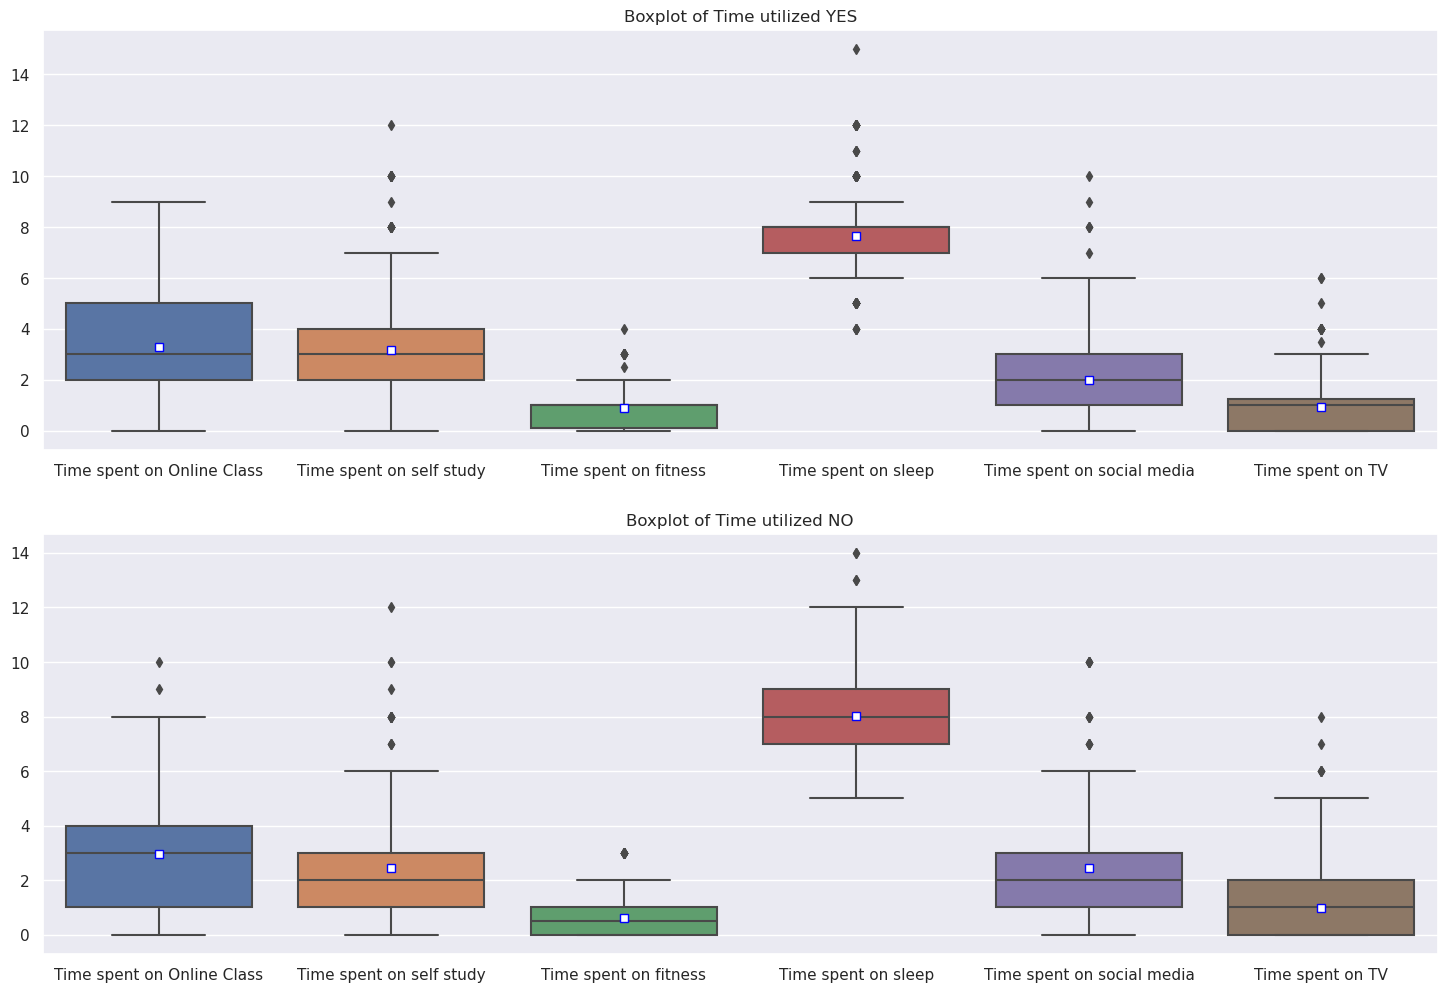

In [28]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(18,12))

sns.boxplot(data=qs1_df[qs1_df["Time utilized"]==1].iloc[:,0:-1],showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},ax=ax1)
ax1.set_title("Boxplot of Time utilized YES")

sns.boxplot(data=qs1_df[qs1_df["Time utilized"]==0].iloc[:,0:-1],showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},ax=ax2)
ax2.set_title("Boxplot of Time utilized NO")

plt.show()

**Nhận xét:**
- Biểu đồ Boxplot of Time utilized YES: 
    - Có khoảng biến thiên tứ phân vị (IQR) **cao** hơn ở các thuộc tính `Time spent onn Online Class`, `Time spent on self study`.
    - Giá trị meadian ở thuộc tính `Time spent on fitness`, `Time spent on sleep` trùng với giá trị của tứ phân vị.
- Biểu đồ Boxplot of Time utilized NO: 
    - Có phân bố của thuộc tính `Time spent on sleep`, `Time spent on TV` rộng hơn.

**Biểu đồ cột chồng:** Quan sát được tỉ lệ số mẫu tối ưu hóa thời gian trong từng thuộc tính.

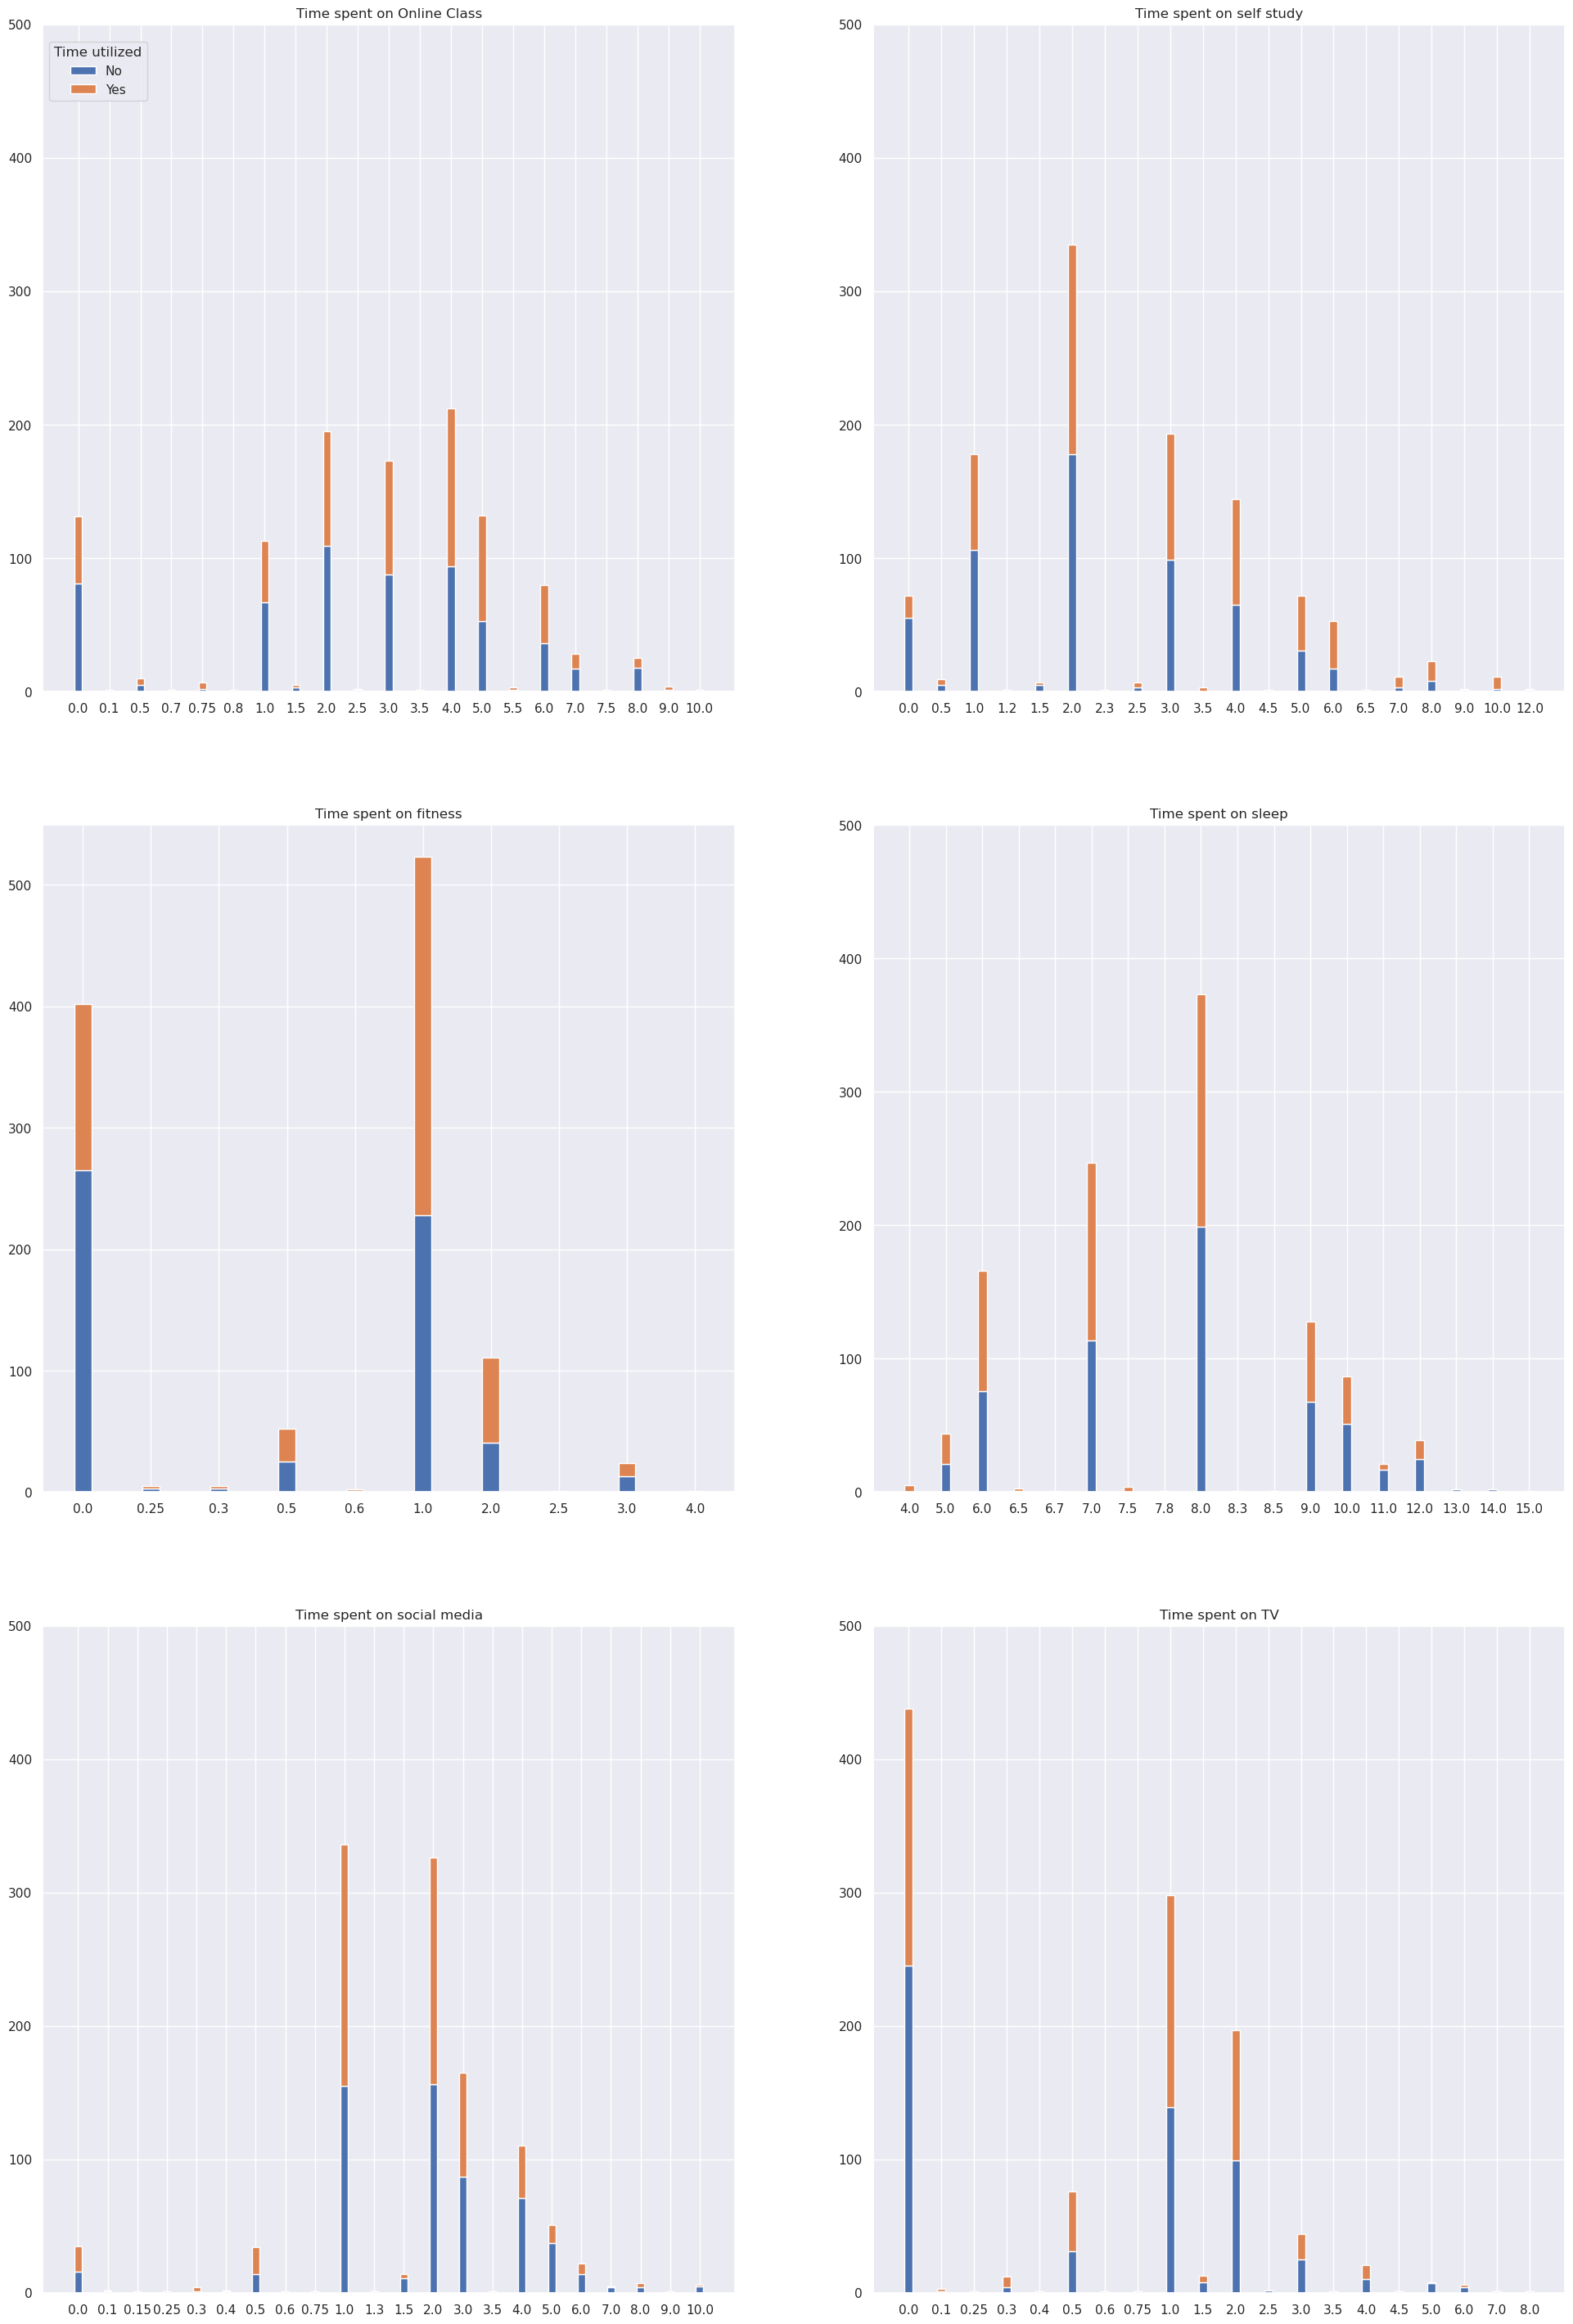

In [29]:
fig, axes = plt.subplots(3,2,figsize=(24,36))
index_fig=[(3,2,1),(3,2,2),(3,2,3),(3,2,4),(3,2,5),(3,2,6)]
barWidth=0.25
for c,(nrows, ncols, plot_number) in zip(qs1_df.columns[:-1],index_fig):
    temp=qs1_df.value_counts(subset=[c,"Time utilized"]).unstack().fillna(0)
    br1 = np.arange(0,len(temp))
    plt.subplot(nrows, ncols, plot_number).bar(br1,temp[0].values,width=0.25,label="No")
    plt.subplot(nrows, ncols, plot_number).bar(br1,temp[1].values,width=0.25,bottom=temp[0],label="Yes")
    plt.xticks(br1,temp.index.astype(str))
    plt.yticks(np.linspace(0,500,6))
    plt.subplot(nrows, ncols, plot_number).set_title(f'{c}')

plt.legend(title='Time utilized',loc='center left',bbox_to_anchor=(-1.2,3.33))
plt.show()

**Nhận xét:**
- Ở các giá trị chiếm phần lớn dữ liệu thường có tỉ lệ giữa `Time utilized==NO` và `Time utilized==YES` xấp xỉ 1/2.

*Note: Vì ở số biểu đồ có độ chênh lệch khoảng cách lớn khó cho việc biểu diễn theo trục hoành(Ví dụ: ở biểu đồ`Time spent on Online Class`: khoảng cách [0 - 10] gấp 100 [0 - 0.1], dẫn đến hiện tượng vẽ đúng tỉ lệ sẽ không thấy rõ được cột), nên nhóm đã ép kiểu dữ liệu của các thuộc tính về `categorical`(chỉ manng tính tạm thời trong biểu đồ này)*

**Biểu đồ đường:** Thấy được rõ độ dao động giữa nhãn của `Time utilized` trong các thuộc tính `Time`.

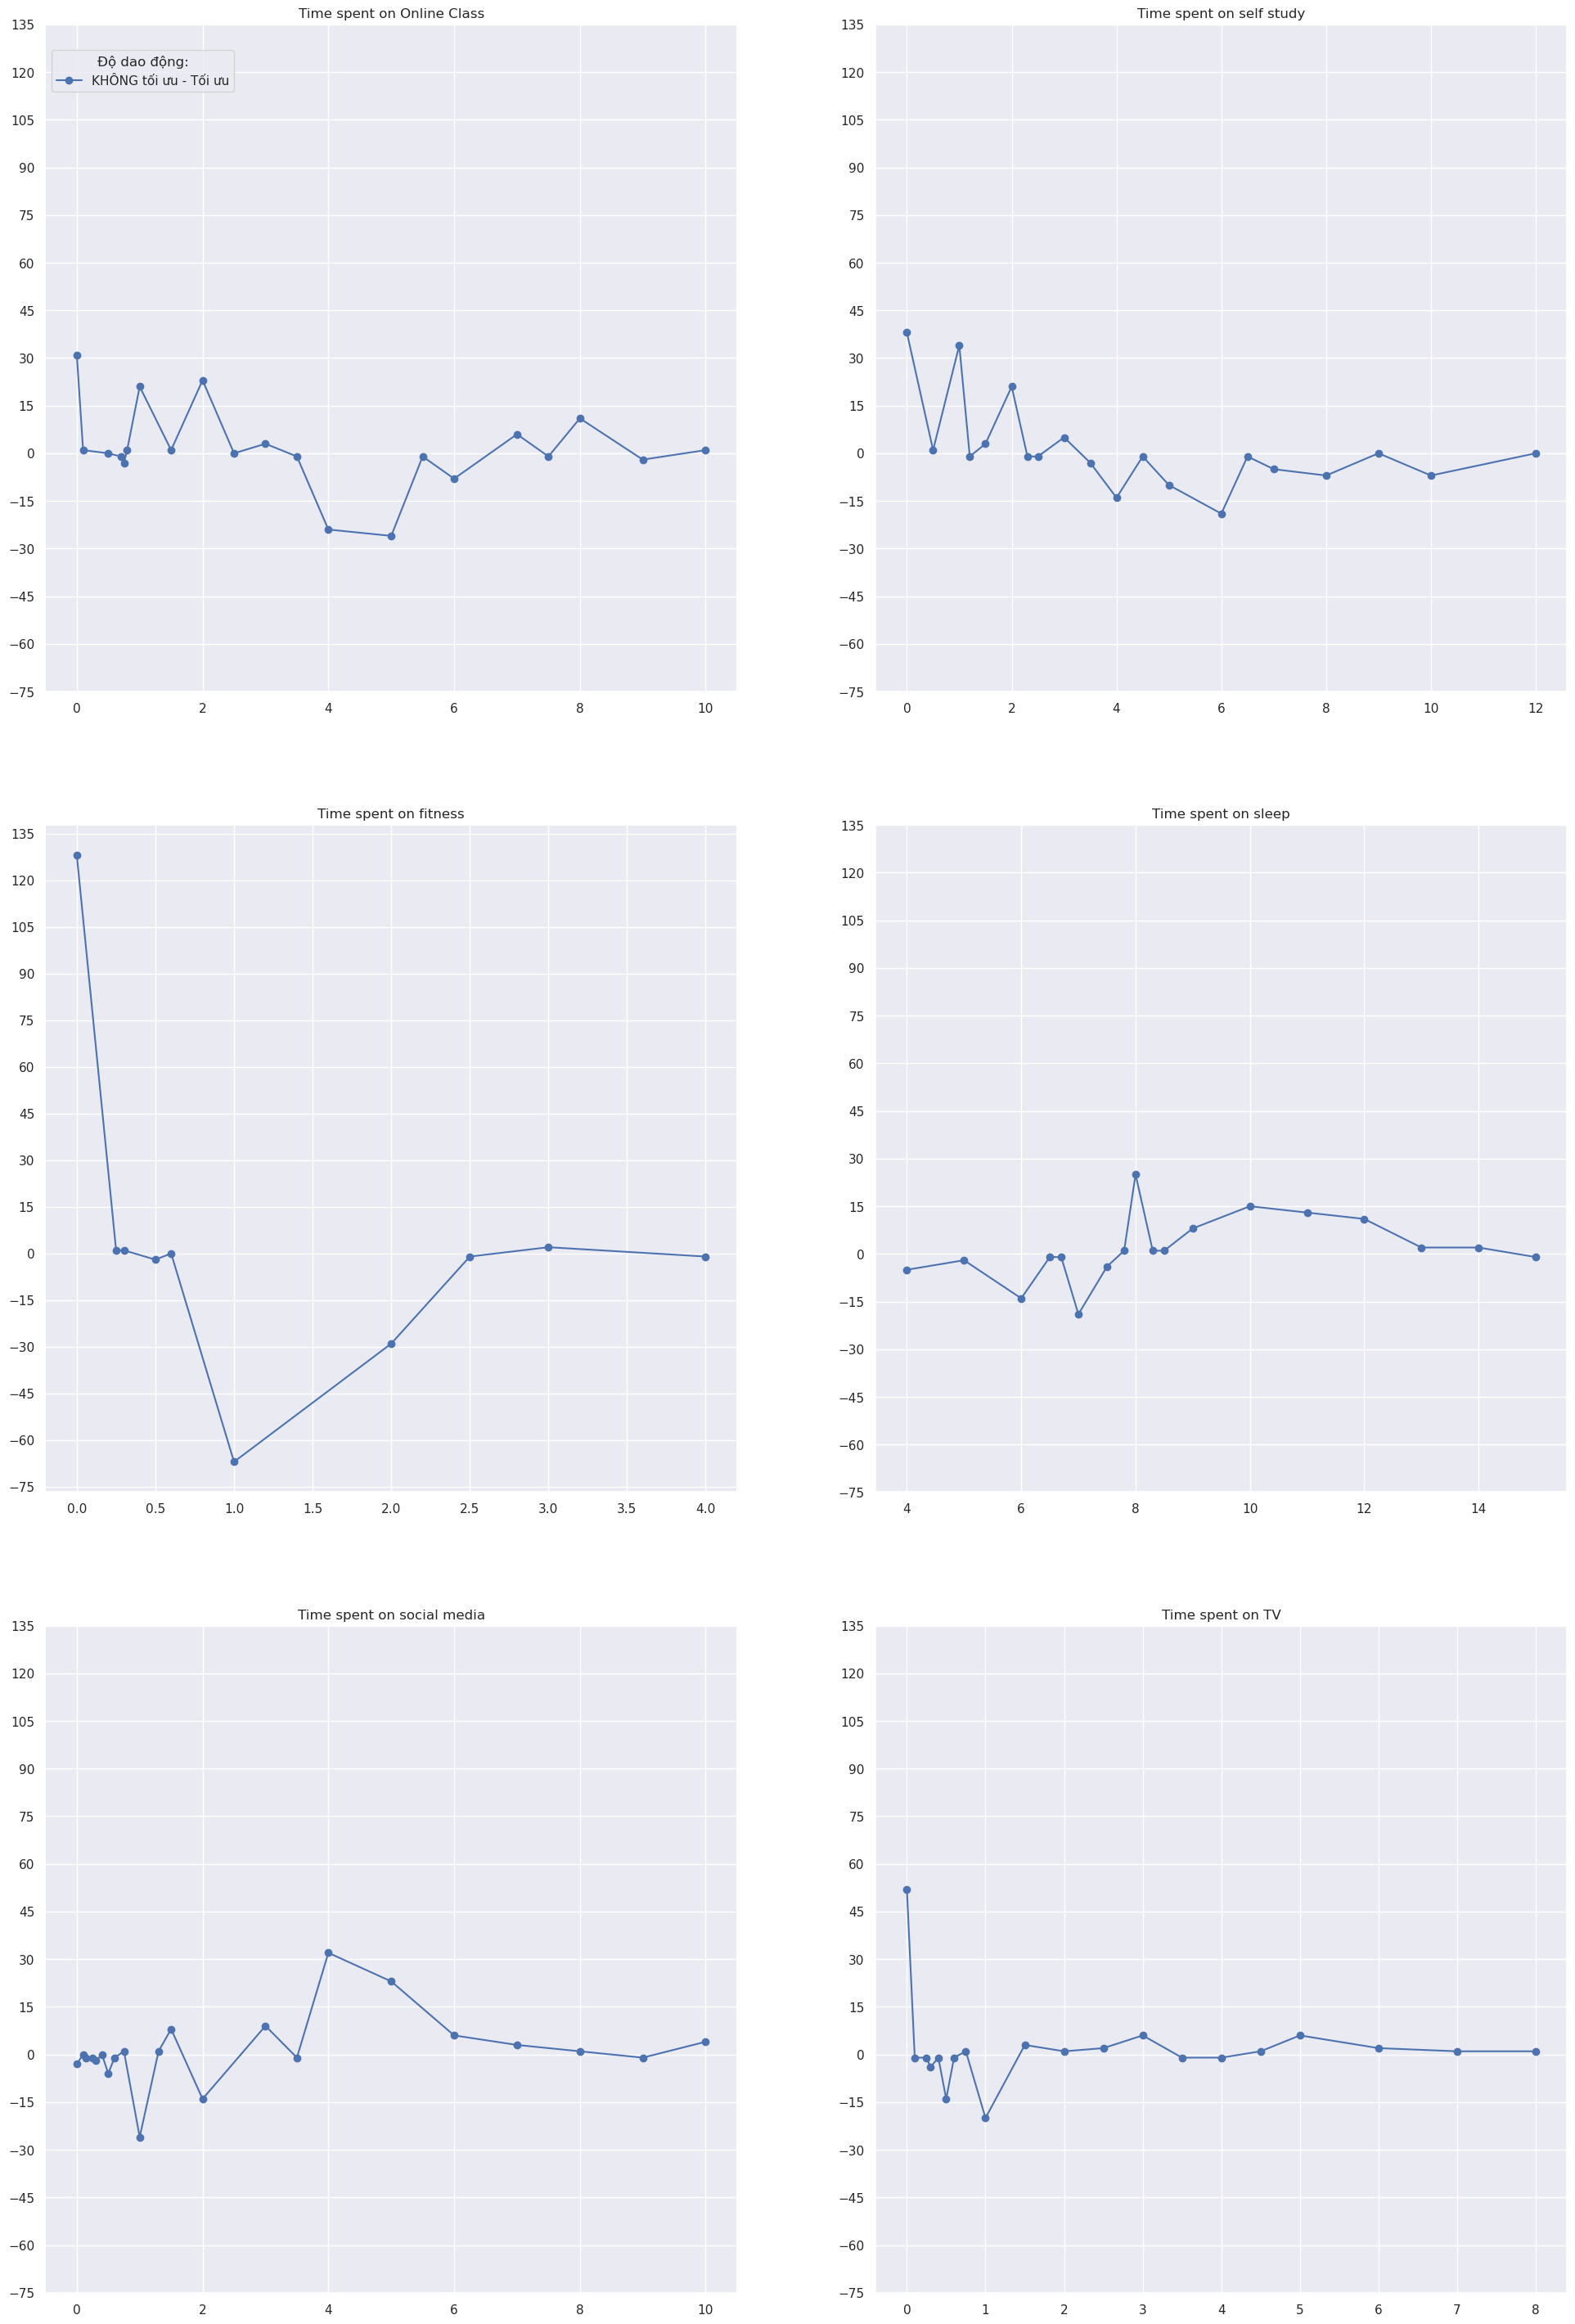

In [30]:
fig, axes = plt.subplots(3,2,figsize=(24,36))
index_fig=[(3,2,1),(3,2,2),(3,2,3),(3,2,4),(3,2,5),(3,2,6)]
barWidth=0.25
for c,(nrows, ncols, plot_number) in zip(qs1_df.columns[:-1],index_fig):
    temp=qs1_df.value_counts(subset=[c,"Time utilized"]).unstack().fillna(0)
    br1 = np.arange(0,len(temp))
    plt.subplot(nrows, ncols, plot_number).plot(temp.index,temp[0].values-temp[1].values,marker='o',linestyle='-',label="KHÔNG tối ưu - Tối ưu")
    plt.yticks(np.arange(-75,125+15,15))
    plt.subplot(nrows, ncols, plot_number).set_title(f'{c}')
plt.legend(title='Độ dao động:',loc='center left',bbox_to_anchor=(-1.2,3.33))
plt.show()

**Nhận xét:**
- Dựa vào biểu đồ ta có thể đọc được có 1 số khoảng thì lượng người cảm thấy **tối ưu** thời gian chiếm nhiều hơn so với người **Không tối ưu** thời gian. Và ngược lại.
- Dao động của `Time spent on fitness` lớn nhất.
- Dao động của `Time spent on sleep` và `Time spent on TV` ổn định hơn so với các thuộc tính khác.

In [31]:
qs1_df.columns

Index(['Time spent on Online Class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Time spent on TV', 'Time utilized'],
      dtype='object')

**Xây dựng mô hình:**

- Các thuộc tính sử dụng:
    - Time spent on Online Class
    - Time spent on self study
    - Time spent on fitness
    - Time spent on sleep
    - Time spent on social media
    - Time spent on TV
    - Time utilized

- Thuật toán sử dụng:
    - Logistic

- Bước thực hiện:
    - Chia tập dữ liệu thành 2 phần: Test (20%), Train(80%).
    - Chạy mô hình với tập dữ liệu Train.
    - Tính p-value(nhãn YES) cho tạp dữ liệu Test. 
    - Xử dụng hàm `roc_curve` để tính tỉ lệ dương tính giả, dương tính thật. Dựa vào tỉ lệ đó để thực hiện vẽ biểu đồ ROC.
    - Từ biểu đồ ROC đánh giá mô hình.

In [32]:
X=qs1_df.iloc[:,0:-1].values
y=qs1_df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model=LogisticRegression().fit(X_train,y_train)

proba_X_test=model.predict_proba(X_test)[:,1]

false_positive,true_positive,thresholds=roc_curve(y_test,proba_X_test)

**Biểu đồ ROC:** có trục tung (y-axis) là tỉ lệ dương tính thật, và trục hoành là tỉ lệ dương tính giả (giá trị thuộc đoạn [0 - 1]). Phương pháp mô hình tốt sẽ có những điểm tham chiếu tập trung ở góc trái thuộc phía trên của biểu đồ. Những điểm này cho chúng ta biết được đó là những giá trị tham chiếu có độ nhạy cao và độ dương tính giả thấp.

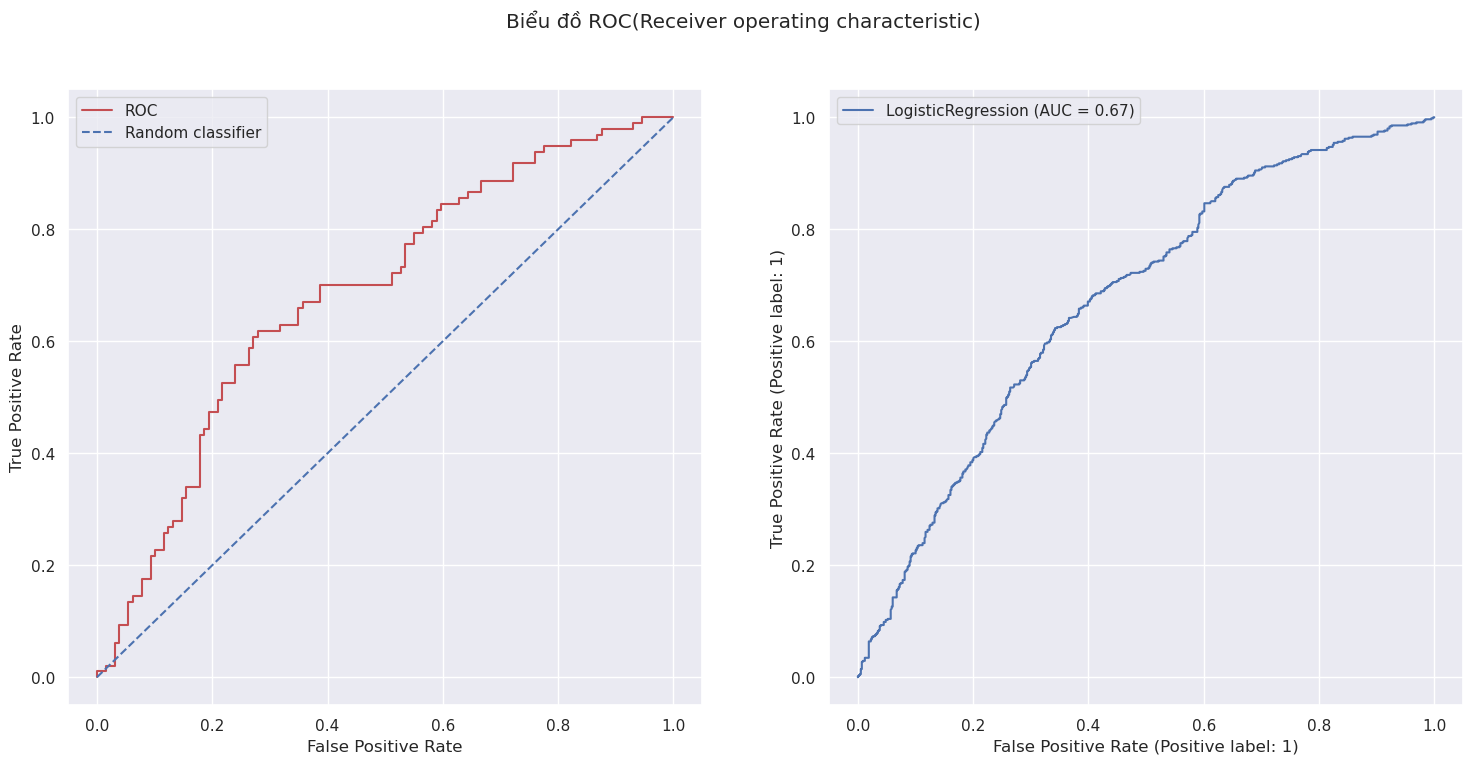

In [33]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,8))
ax1.plot(false_positive,true_positive,'r',label="ROC")
ax1.plot(np.linspace(0,1,50),np.linspace(0,1,50),'b',linestyle='--',label="Random classifier")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.legend()
plot_roc_curve(LogisticRegression().fit(X,y),X,y,ax=ax2)

plt.legend()
plt.suptitle("Biểu đồ ROC(Receiver operating characteristic)")
plt.show()

**Nhận xét:**
- AUC(area under the curve): ước tính diện tích dưới đuòng biểu diễn ROC.
- Dựa trên`AUC = 0.67` ta đánh giá được mô hình trên không tốt.

**Giải thích:**
<em>Tham khảo:
- [1. Measuring Performance: AUC (AUROC)](https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/)</em>


**Thực hiện tiền xử lý (giảm chiều, chuẩn hóa) để trực quan dữ liệu**

In [34]:
scale_qs1_df=MinMaxScaler().fit_transform(qs1_df.iloc[:,0:-1])
zscore_qs1_df=StandardScaler().fit_transform(qs1_df.iloc[:,0:-1])

In [35]:
pca_qs1_df=PCA(2).fit_transform(qs1_df.iloc[:,0:-1])
pca_qs1_df=pd.DataFrame(pca_qs1_df,columns=['pca1','pca2'])
pca_qs1_df["label"]=qs1_df["Time utilized"]

pca_scale_qs1_df=PCA(2).fit_transform(scale_qs1_df)
pca_scale_qs1_df=pd.DataFrame(pca_scale_qs1_df,columns=['pca1','pca2'])
pca_scale_qs1_df["label"]=qs1_df["Time utilized"]

pca_zscore_qs1_df=PCA(2).fit_transform(zscore_qs1_df)
pca_zscore_qs1_df=pd.DataFrame(pca_zscore_qs1_df,columns=['pca1','pca2'])
pca_zscore_qs1_df["label"]=qs1_df["Time utilized"]

**Biểu đồ scatter:** Dựa vào phân tán của dữ liệu để đánh giá mối quan hệ của dữ liệu.

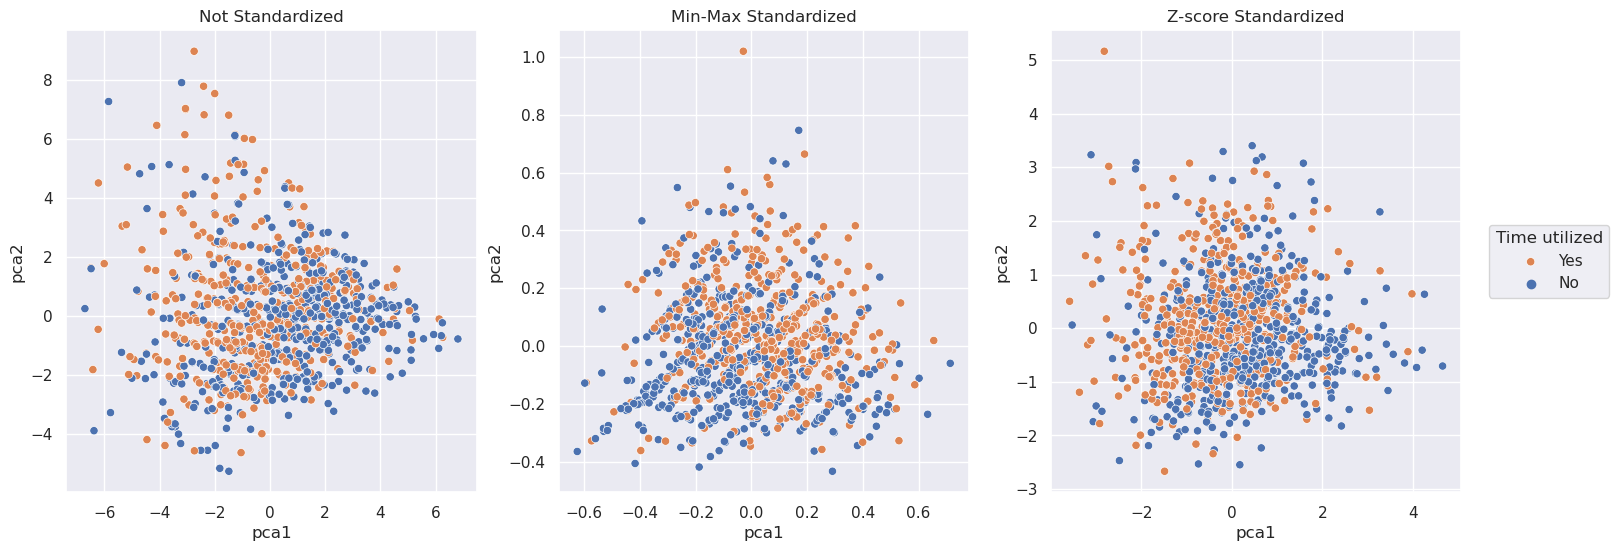

In [36]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

sns.scatterplot(x='pca1',y='pca2',data=pca_qs1_df,hue='label',ax=ax1)
ax1.set_title("Not Standardized")
ax1.legend_.remove()

sns.scatterplot(x='pca1',y='pca2',data=pca_scale_qs1_df,hue="label",ax=ax2)
ax2.set_title("Min-Max Standardized")
ax2.legend_.remove()

sns.scatterplot(x='pca1',y='pca2',data=pca_zscore_qs1_df,hue="label",ax=ax3)
ax3.set_title("Z-score Standardized")
ax3.legend_.remove()

plt.legend(title="Time utilized",labels=["Yes","No"],loc='center left',bbox_to_anchor=(1.05,0.5))
plt.show()

**Nhận xét:**
- Dữ liệu phân tán không quá tách biệt rõ ràng. Nhưng vẫn có 1 số khu vực các điểm màu tập trung chiếm nhiều hơn điểm màu còn lại.

### Kết luận: Có tương quan yếu giữa các thuộc tính `Time` với thuộc tính `Time utilized`.